In [1]:
import pandas as pd

In [2]:
def show_res(file: str):
  df = pd.read_csv(file)

  true = 0
  total = 0
  for _, row in df.iterrows():
    total += 1
    if row["exact_match"] == 1:
      true += 1
      
  print(true,total)
  print(true/total)

  prob_nsw_dict = {}

  for _, row in df.iterrows():
      tag = row["test_tag"].strip()
      if tag not in prob_nsw_dict.keys():
        prob_nsw_dict[tag] = {"true": 0,
                              "total": 0}
      prob_nsw_dict[tag]["total"] += 1
      if row["exact_match"] == 1:
        prob_nsw_dict[tag]["true"] += 1
        
  import matplotlib.pyplot as plt

  # Compute accuracy for each tag
  tag_accuracy = []
  for tag, values in prob_nsw_dict.items():
      accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
      tag_accuracy.append((tag, accuracy))

  # Sort by descending accuracy
  tag_accuracy.sort(key=lambda x: x[1], reverse=True)

  # Unpack
  tag_names, accuracies = zip(*tag_accuracy)

  # Plot
  plt.figure(figsize=(12, 6))
  bars = plt.bar(tag_names, accuracies, color='skyblue')
  plt.xlabel("NSW Type (Tag)")
  plt.ylabel("Accuracy")
  plt.title("Accuracy per NSW Type (Descending)")
  plt.ylim(0, 1.05)

  # Add percentage on top of bars
  for bar, acc in zip(bars, accuracies):
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

241 1191
0.20235096557514692


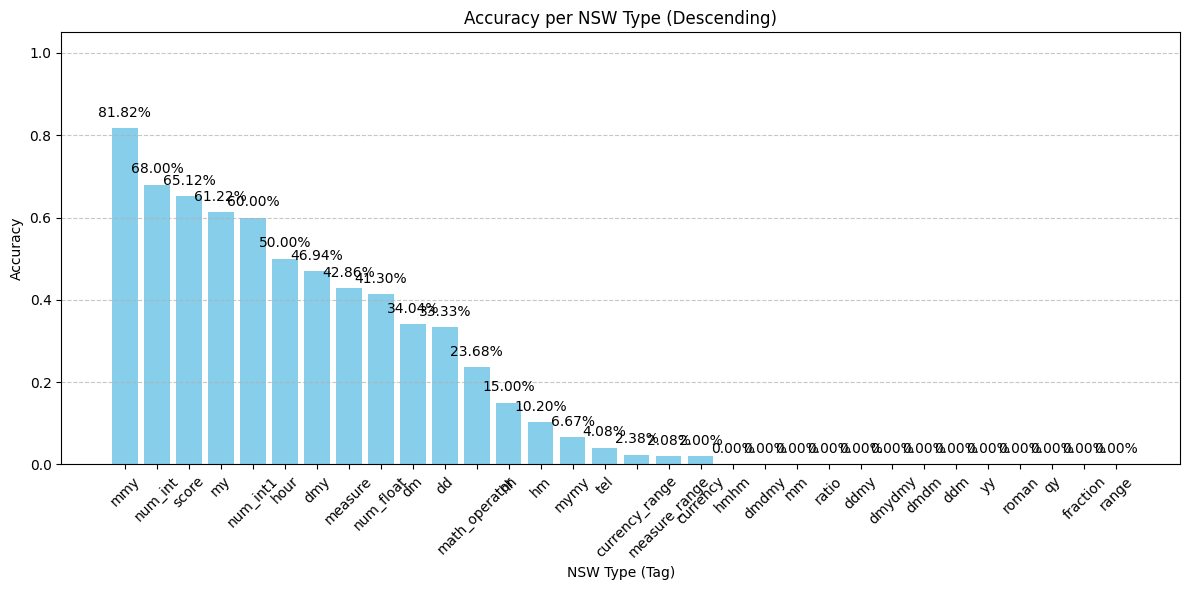

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-10/14:00:02_vinorm_1_eval.csv"
show_res(file)

11 1191
0.009235936188077247


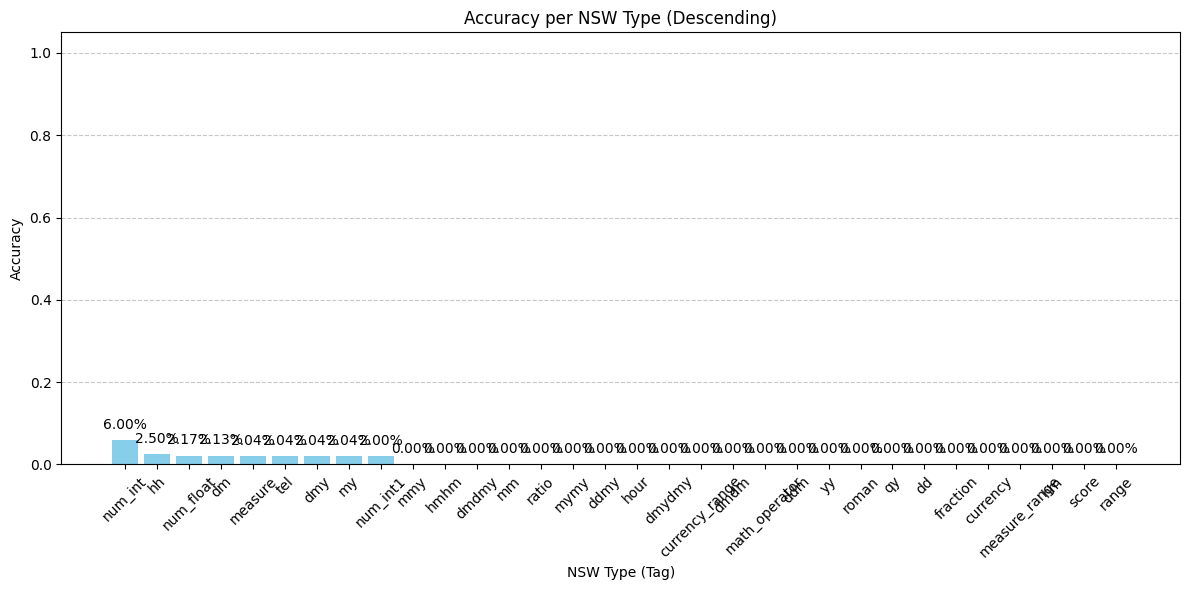

In [4]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-10/10:13:24_vinorm_1_eval.csv"
show_res(file)

In [8]:
from vinorm import TTSnorm
S=TTSnorm("Hàm này được phát triển từ 8/2019. Có phải tháng 12/2020 đã có vaccine phòng ngừa Covid-19 xmz ?", punc = False, unknown = True, lower = True, rule = False)
print(S)

hàm này được phát triển từ tám , hai nghìn không trăm mười chín . có phải tháng mười hai năm hai nghìn không trăm hai mươi đã có vaccine phòng ngừa covid mười chín xmz .. 


323 1191
0.27120067170445006


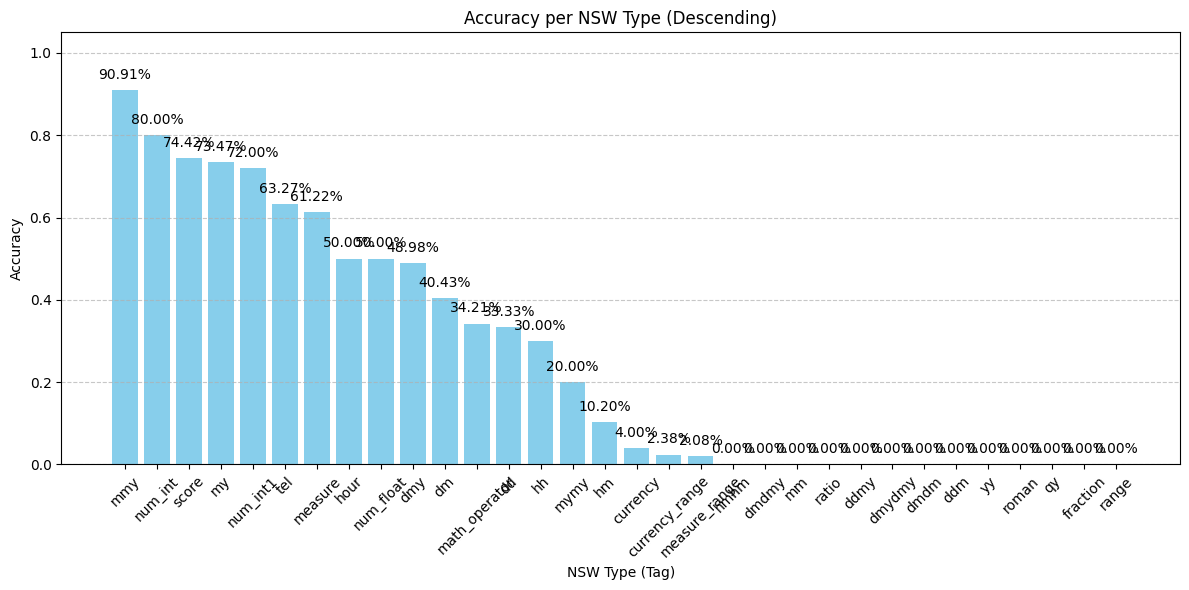

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-12/23:18:32_vinorm_1_eval.csv"
show_res(file)

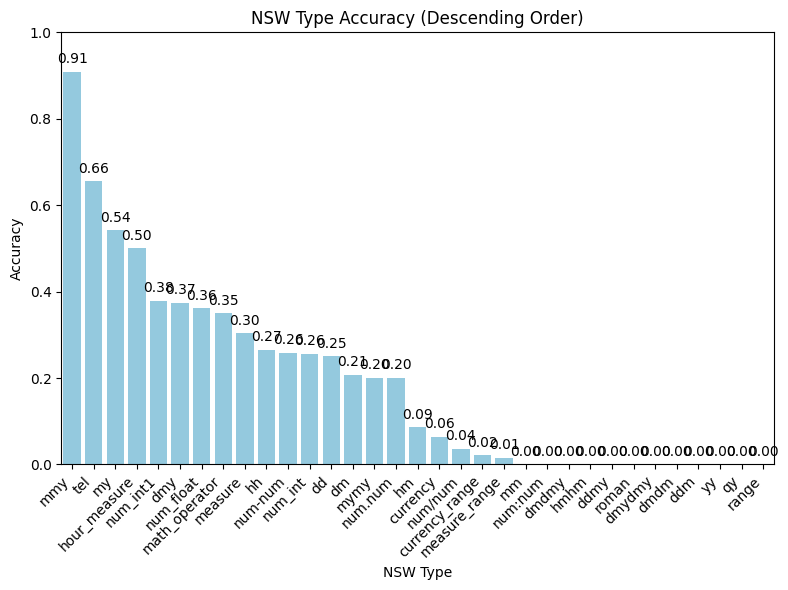


NSW Type Accuracy Statistics:
mmy: 10/11 correct, Accuracy = 0.91
num_int: 233/908 correct, Accuracy = 0.26
num_float: 26/72 correct, Accuracy = 0.36
num_int1: 55/145 correct, Accuracy = 0.38
measure: 61/201 correct, Accuracy = 0.30
hmhm: 0/17 correct, Accuracy = 0.00
hh: 13/49 correct, Accuracy = 0.27
dm: 30/145 correct, Accuracy = 0.21
hm: 5/58 correct, Accuracy = 0.09
num-num: 38/147 correct, Accuracy = 0.26
dmy: 28/75 correct, Accuracy = 0.37
dmdmy: 0/18 correct, Accuracy = 0.00
dd: 1/4 correct, Accuracy = 0.25
mm: 0/10 correct, Accuracy = 0.00
num:num: 0/13 correct, Accuracy = 0.00
num.num: 2/10 correct, Accuracy = 0.20
math_operator: 14/40 correct, Accuracy = 0.35
mymy: 3/15 correct, Accuracy = 0.20
roman: 0/56 correct, Accuracy = 0.00
ddmy: 0/41 correct, Accuracy = 0.00
dmydmy: 0/55 correct, Accuracy = 0.00
num/num: 3/82 correct, Accuracy = 0.04
my: 39/72 correct, Accuracy = 0.54
hour_measure: 8/16 correct, Accuracy = 0.50
measure_range: 1/68 correct, Accuracy = 0.01
dmdm: 0/50

In [2]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-13/15:05:26_vinorm_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Compute accuracy per NSW type
tag_scores = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for plotting
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()

# Save plot (optional)
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag, accuracy in tag_accuracies.items():
    total = len(tag_scores[tag])
    correct = sum(tag_scores[tag])
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")


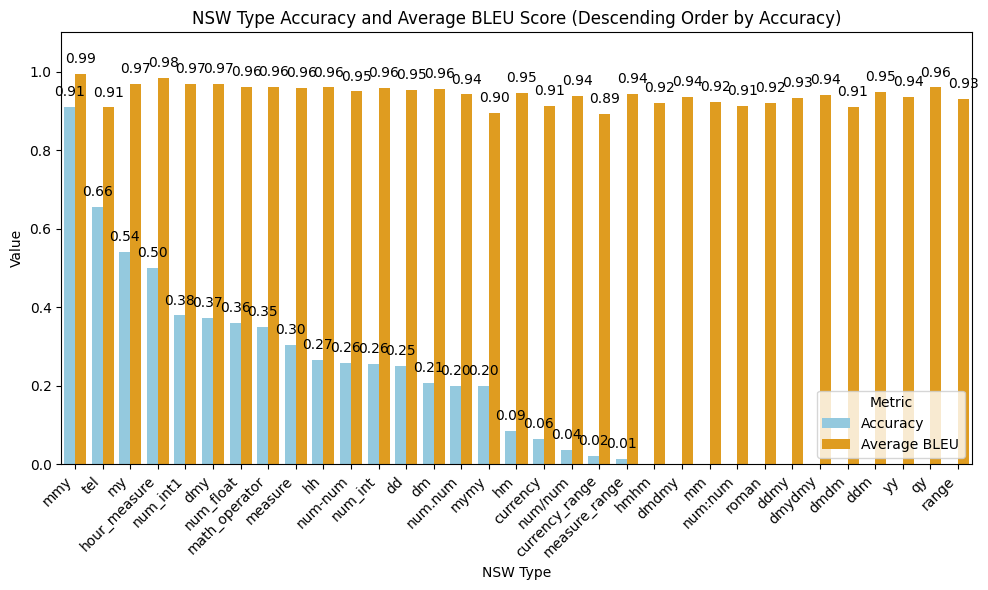


NSW Type Statistics:
mmy:
  Accuracy: 10/11 correct, 0.91
  Average BLEU: 0.99
tel:
  Accuracy: 38/58 correct, 0.66
  Average BLEU: 0.91
my:
  Accuracy: 39/72 correct, 0.54
  Average BLEU: 0.97
hour_measure:
  Accuracy: 8/16 correct, 0.50
  Average BLEU: 0.98
num_int1:
  Accuracy: 55/145 correct, 0.38
  Average BLEU: 0.97
dmy:
  Accuracy: 28/75 correct, 0.37
  Average BLEU: 0.97
num_float:
  Accuracy: 26/72 correct, 0.36
  Average BLEU: 0.96
math_operator:
  Accuracy: 14/40 correct, 0.35
  Average BLEU: 0.96
measure:
  Accuracy: 61/201 correct, 0.30
  Average BLEU: 0.96
hh:
  Accuracy: 13/49 correct, 0.27
  Average BLEU: 0.96
num-num:
  Accuracy: 38/147 correct, 0.26
  Average BLEU: 0.95
num_int:
  Accuracy: 233/908 correct, 0.26
  Average BLEU: 0.96
dd:
  Accuracy: 1/4 correct, 0.25
  Average BLEU: 0.95
dm:
  Accuracy: 30/145 correct, 0.21
  Average BLEU: 0.96
num.num:
  Accuracy: 2/10 correct, 0.20
  Average BLEU: 0.94
mymy:
  Accuracy: 3/15 correct, 0.20
  Average BLEU: 0.90
hm:
  

In [2]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-13/15:05:26_vinorm_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric (strip quotes if needed)
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute accuracy and average BLEU per NSW type
tag_scores = {}  # {tag: [scores]}
tag_bleu_sums = {}  # {tag: [sum of bleu1,bleu2,bleu3,bleu4]}
tag_counts = {}  # {tag: count of occurrences}

for idx, row in df.iterrows():
    nsw_dict = row["nsw_exact_match"]
    bleu_avg = row[bleu_cols].mean()  # Average of bleu1, bleu2, bleu3, bleu4 for this row
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_bleu_sums.setdefault(tag, []).append(bleu_avg)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy and average BLEU for each tag
tag_stats = {
    tag: {
        "accuracy": sum(scores) / len(scores),
        "avg_bleu": sum(bleu_sums) / len(bleu_sums)
    }
    for tag, scores in tag_scores.items()
    for bleu_sums in [tag_bleu_sums[tag]]
}

# Convert to DataFrame for plotting
plot_data = []
for tag, stats in tag_stats.items():
    plot_data.append({"NSW Type": tag, "Metric": "Accuracy", "Value": stats["accuracy"]})
    plot_data.append({"NSW Type": tag, "Metric": "Average BLEU", "Value": stats["avg_bleu"]})
plot_df = pd.DataFrame(plot_data)

# Sort by accuracy (descending) for consistent order
accuracy_order = [
    tag for tag, stats in sorted(tag_stats.items(), key=lambda x: x[1]["accuracy"], reverse=True)
]
plot_df["NSW Type"] = pd.Categorical(plot_df["NSW Type"], categories=accuracy_order, ordered=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="NSW Type", y="Value", hue="Metric", palette={"Accuracy": "skyblue", "Average BLEU": "orange"})
plt.title("NSW Type Accuracy and Average BLEU Score (Descending Order by Accuracy)")
plt.xlabel("NSW Type")
plt.ylabel("Value")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(
            p.get_x() + p.get_width() / 2,
            height + 0.02,
            f"{height:.2f}",
            ha="center",
            va="bottom"
        )
plt.legend(title="Metric")
plt.tight_layout()

# Save plot
plt.savefig("nsw_accuracy_bleu_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Statistics:")
for tag in accuracy_order:
    accuracy = tag_stats[tag]["accuracy"]
    avg_bleu = tag_stats[tag]["avg_bleu"]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}:")
    print(f"  Accuracy: {correct}/{total} correct, {accuracy:.2f}")
    print(f"  Average BLEU: {avg_bleu:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")


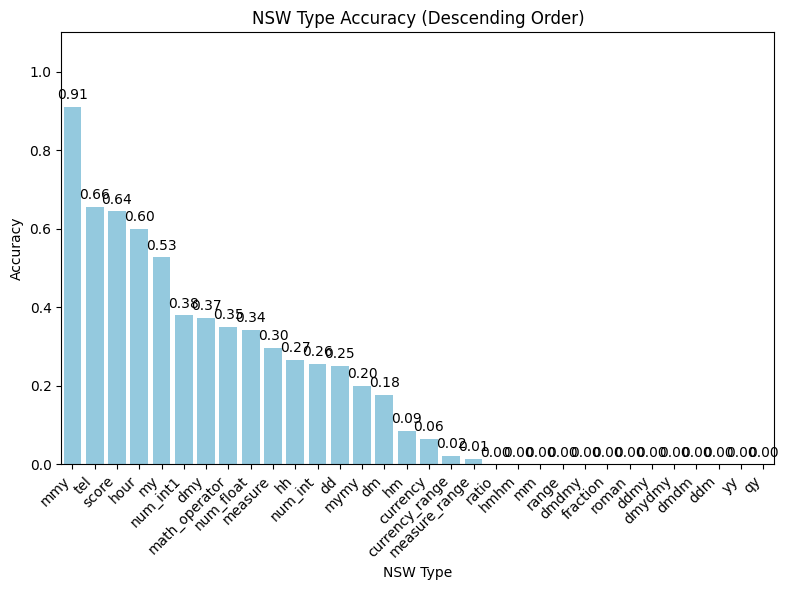

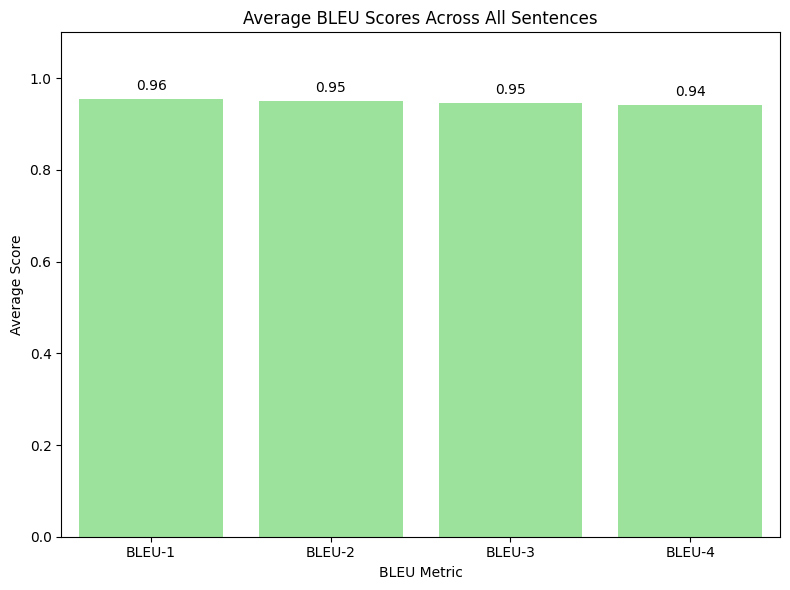


NSW Type Accuracy Statistics:
mmy: 10/11 correct, Accuracy = 0.91
tel: 38/58 correct, Accuracy = 0.66
score: 38/59 correct, Accuracy = 0.64
hour: 6/10 correct, Accuracy = 0.60
my: 39/74 correct, Accuracy = 0.53
num_int1: 55/145 correct, Accuracy = 0.38
dmy: 28/75 correct, Accuracy = 0.37
math_operator: 14/40 correct, Accuracy = 0.35
num_float: 28/82 correct, Accuracy = 0.34
measure: 61/205 correct, Accuracy = 0.30
hh: 13/49 correct, Accuracy = 0.27
num_int: 233/911 correct, Accuracy = 0.26
dd: 1/4 correct, Accuracy = 0.25
mymy: 3/15 correct, Accuracy = 0.20
dm: 33/187 correct, Accuracy = 0.18
hm: 5/58 correct, Accuracy = 0.09
currency: 5/78 correct, Accuracy = 0.06
currency_range: 1/47 correct, Accuracy = 0.02
measure_range: 1/68 correct, Accuracy = 0.01
ratio: 0/13 correct, Accuracy = 0.00
hmhm: 0/17 correct, Accuracy = 0.00
mm: 0/10 correct, Accuracy = 0.00
range: 0/88 correct, Accuracy = 0.00
dmdmy: 0/18 correct, Accuracy = 0.00
fraction: 0/40 correct, Accuracy = 0.00
roman: 0/56 c

In [1]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-13/16:49:43_vinorm_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute BLEU averages across all sentences
bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

# Compute accuracy per NSW type
tag_scores = {}
tag_counts = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for NSW accuracy plot
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot NSW accuracy bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert BLEU averages to DataFrame for plot
bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

# Plot BLEU averages bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
plt.title("Average BLEU Scores Across All Sentences")
plt.xlabel("BLEU Metric")
plt.ylabel("Average Score")
plt.ylim(0, 1.1)
for i, v in enumerate(bleu_df["Average BLEU"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag in accuracy_df.index:
    accuracy = tag_accuracies[tag]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

print("\nBLEU Score Averages:")
for bleu_metric, avg in bleu_averages.items():
    print(f"{bleu_metric}: {avg:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")
